In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

In [2]:
datapath = Path("data/housing")
housing = pd.read_csv( datapath / "housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


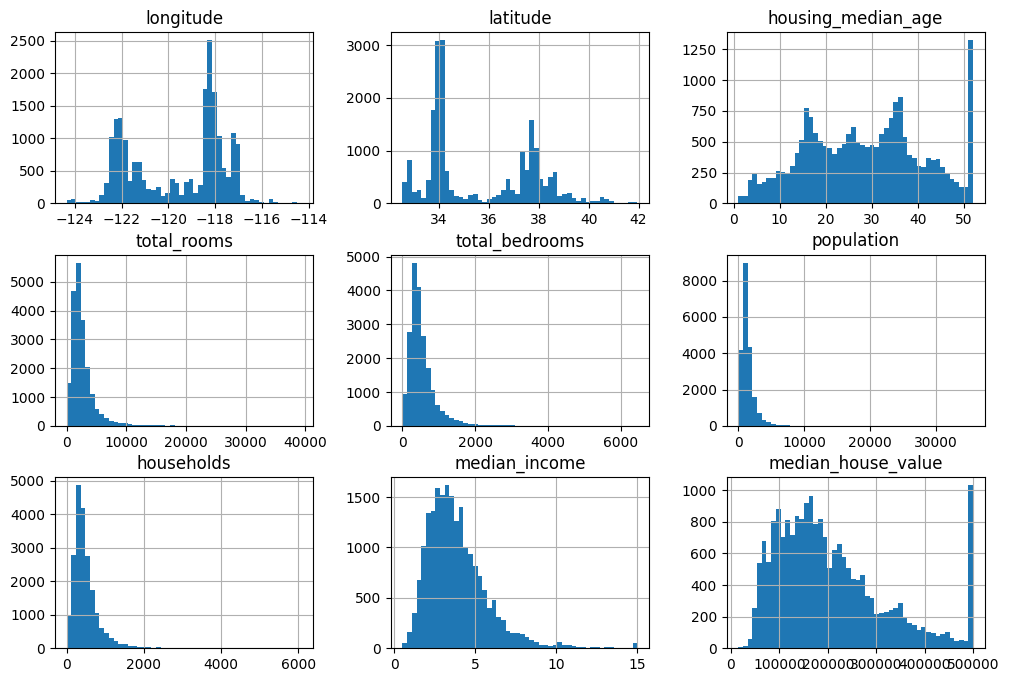

In [7]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
housing['income_cat']=pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])

In [10]:
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

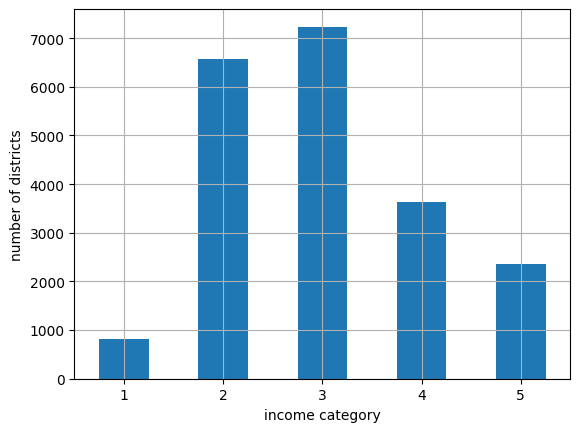

In [11]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("income category")
plt.ylabel("number of districts")
plt.show()

In [12]:
df_train_rand_samp , df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42
)
df_train , df_test = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing['income_cat']
)

In [13]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

compare_samp = pd.DataFrame({
    "total (%)": income_cat_proportions(housing),
    "layers (%)": income_cat_proportions(df_test),
    "random (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_samp.index.name = "income category"
compare_samp["Error - layers (%)"] = (compare_samp['layers (%)']/compare_samp['total (%)']-1)
compare_samp["Error - random (%)"] = (compare_samp['random (%)']/compare_samp['total (%)']-1)
(compare_samp*100).round(2)

,total (%),layers (%),random (%),Error - layers (%),Error - random (%)
income category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [14]:
for set_ in (df_test, df_train):
  set_.drop("income_cat", axis=1, inplace=True)


In [15]:
df_train_eda = df_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

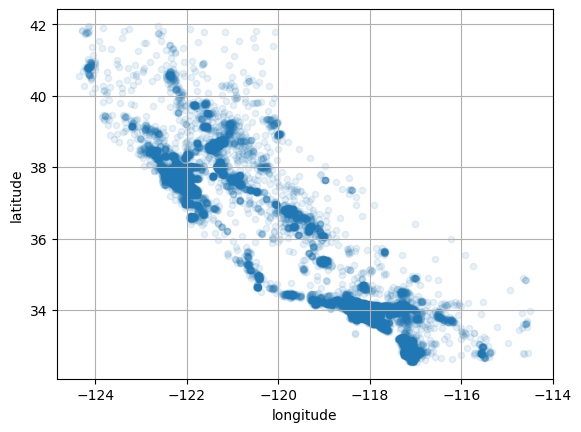

In [16]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.1)

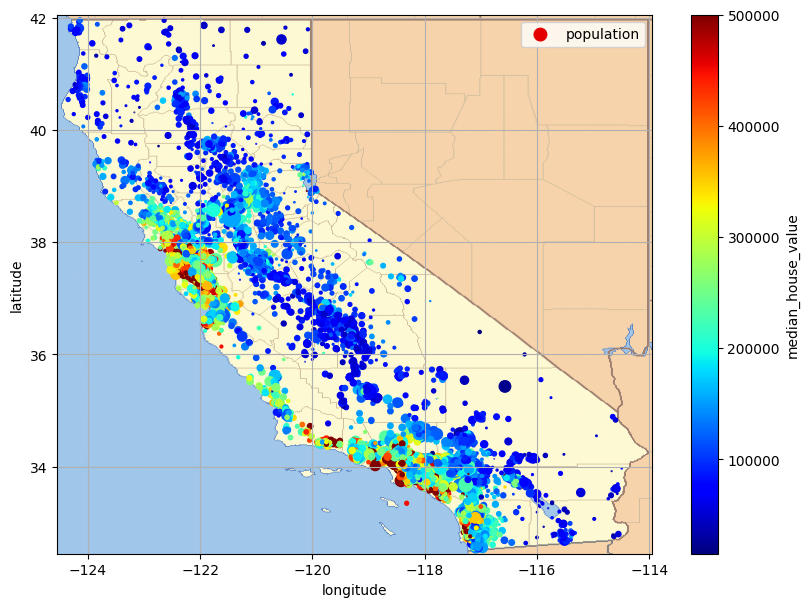

In [17]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                  s=df_train_eda['population']/100 ,label="population",
                  c='median_house_value',cmap='jet', colorbar=True,
                  legend=True, sharex=True, figsize=(10,7))
california_img = plt.imread(datapath / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [18]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: >

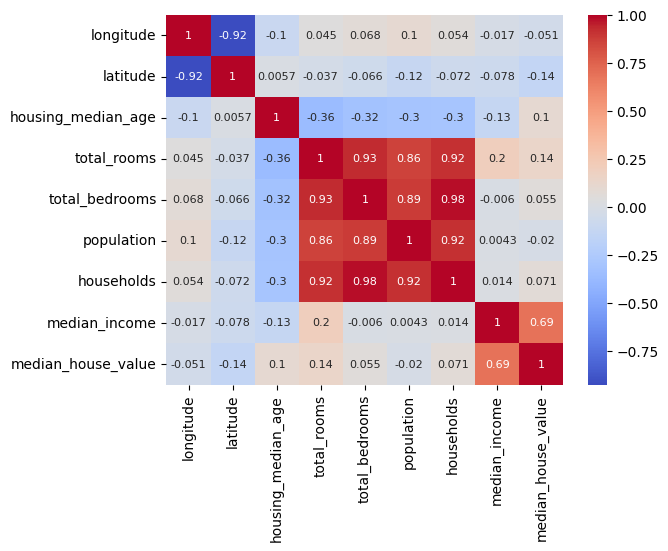

In [20]:
import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8})

<Axes: >

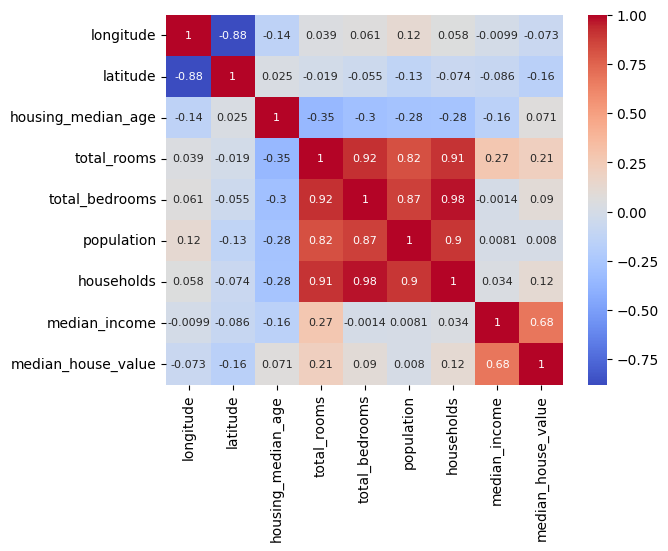

In [21]:
#Spearman
corr_matrix_spr = df_train_eda.select_dtypes(np.number).corr(method='spearman')
sns.heatmap(corr_matrix_spr, cmap='coolwarm', annot=True, annot_kws={'size':8})

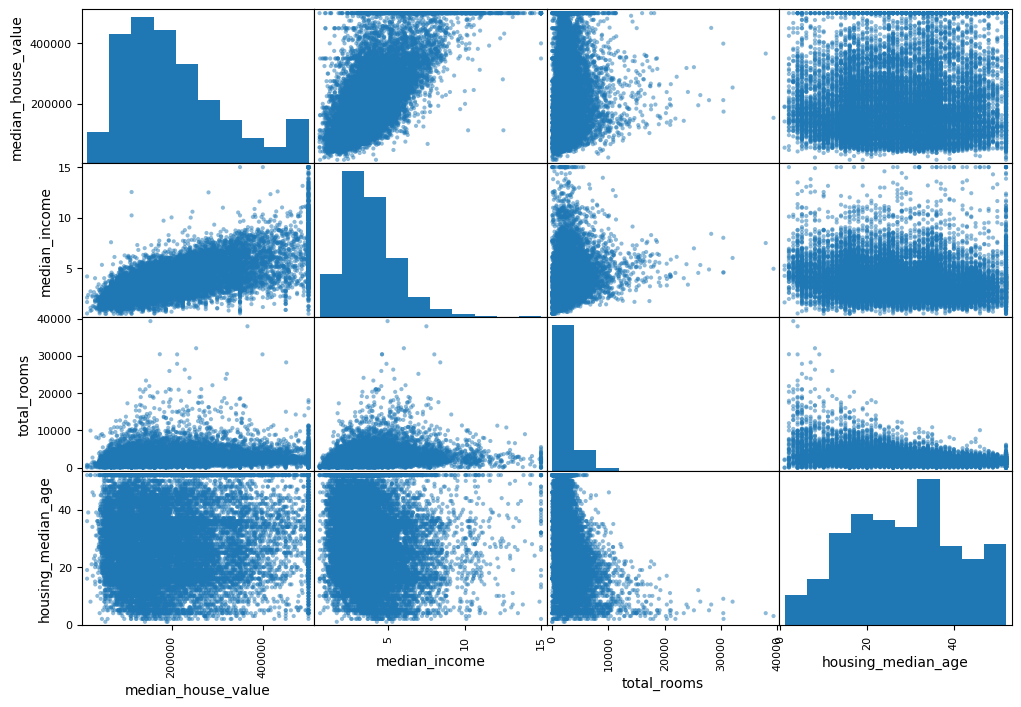

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

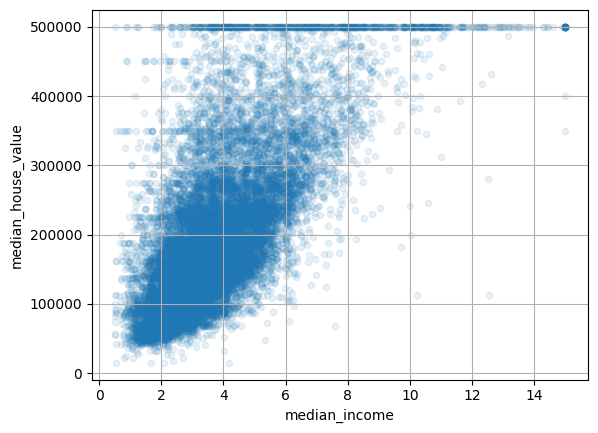

In [23]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid='show')

In [24]:
df_train_eda['rooms_per_household'] = df_train_eda['total_rooms']/df_train_eda['households']
df_train_eda['bedrooms_per_room'] = df_train_eda['total_bedrooms']/df_train_eda['total_rooms']
df_train_eda['population_per_household'] = df_train_eda['population']/df_train_eda['households']

In [25]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

In [26]:
X_train = df_train.drop('median_house_value', axis=1)
y_train = df_train['median_house_value'].copy()

In [27]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [29]:
#Option 1
X_train_option = X_train.copy()
X_train_option.dropna(subset=['total_bedrooms'], inplace=True)
X_train_option.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [30]:
#Option 2
X_train_option2 = X_train.copy()
X_train_option2.drop('total_bedrooms', axis=1, inplace=True)
X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [31]:
#Option 3
X_train_option3 = X_train.copy()
median = X_train['total_bedrooms'].median()
X_train_option3['total_bedrooms'].fillna(median, inplace=True)
X_train_option3.loc[null_rows_idx].head()

C:\Users\jakub\AppData\Local\Temp\ipykernel_9728\213076567.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_option3['total_bedrooms'].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [33]:
X_train_num = X_train.select_dtypes(include=[np.number])

imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [35]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
X = imputer.transform(X_train_num)

In [37]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]], shape=(16512, 8))

In [38]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns, index=X_train.index)
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [39]:
imputer = SimpleImputer(strategy='median').set_output(transform='pandas')
X = imputer.fit_transform(X_train_num)
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [40]:
X_train_cat = X_train[['ocean_proximity']]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder().set_output(transform='pandas')
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
X_train_cat_encoded[:8]

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0
1286,1.0
18078,0.0
4396,3.0


In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [43]:
sample_df = pd.DataFrame({"ocean_proximity": ["NEAR BAY", "INLAND"]})
pd.get_dummies(sample_df)
cat_encoder.transform(sample_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0


In [44]:
sample_unknown_df = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(sample_unknown_df)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [45]:
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(sample_unknown_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [46]:
df_output = pd.DataFrame(X_train_cat_1hot, columns=cat_encoder.get_feature_names_out(), index=X_train_cat.index)
df_output.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


In [47]:
X_train_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1)).set_output(transform='pandas')
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_num)
X_train_num_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-0.031060,-0.343033,0.081457,-0.865842,-0.826720,-0.825480,-0.813705,-0.535106
std,0.405806,0.453892,0.493558,0.111160,0.136532,0.134314,0.142940,0.260953
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926497,-0.904977,-0.903815,-0.896211,-0.715507
50%,0.184584,-0.636170,0.098039,-0.892009,-0.860525,-0.857195,-0.848049,-0.580889
75%,0.286004,0.100000,0.411765,-0.839666,-0.792559,-0.788615,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().set_output(transform='pandas')
X_train_num_std_scaled = std_scaler.fit_transform(X_train_num)
X_train_num_std_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


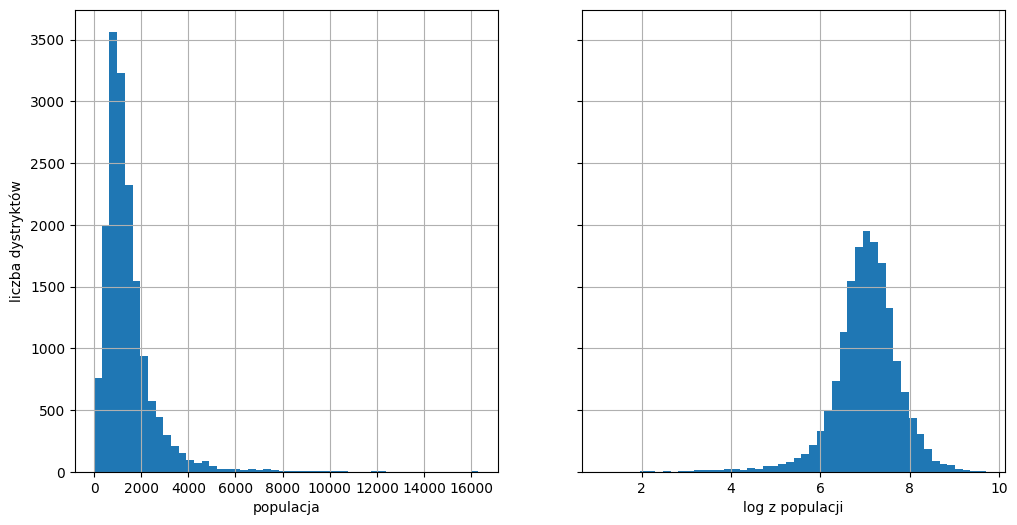

In [50]:
fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=True)
X_train['population'].hist(bins=50, ax=axs[0])
X_train['population'].apply(np.log).hist(bins=50, ax=axs[1])
axs[0].set_xlabel("populacja")
axs[0].set_ylabel("liczba dystryktów")
axs[1].set_xlabel("log z populacji")
plt.show()


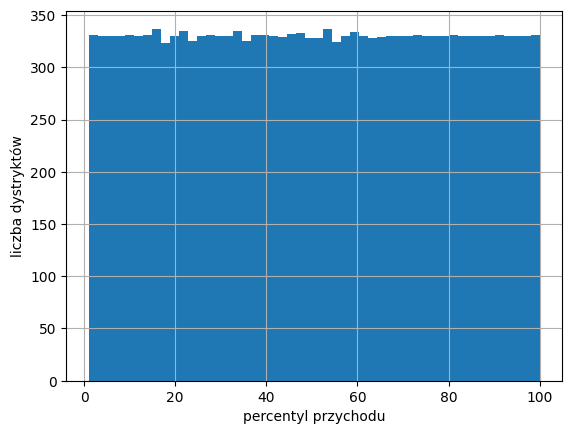

In [51]:
percentiles = [np.percentile(X_train['median_income'], p) for p in range(1,100)]

X_train['median_income_percentiles'] = pd.cut(X_train['median_income'], bins=[-np.inf]+percentiles+[np.inf], labels=range(1,100+1))
X_train['median_income_percentiles'] = X_train['median_income_percentiles'].astype('int')
X_train['median_income_percentiles'].hist(bins=50)
plt.xlabel("percentyl przychodu")
plt.ylabel("liczba dystryktów")
plt.show()

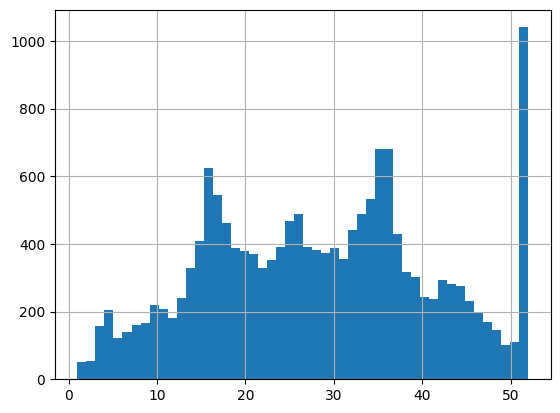

In [52]:
X_train.drop('median_income_percentiles', axis=1, inplace=True)
X_train['housing_median_age'].hist(bins=50)
plt.show()

In [53]:
from sklearn.metrics.pairwise import rbf_kernel

X_train['age_simil_35_v1'] = rbf_kernel(X_train[['housing_median_age']], [[35]], gamma=0.1)
X_train['age_simil_35_v2'] = rbf_kernel(X_train[['housing_median_age']], [[35]], gamma=0.03)


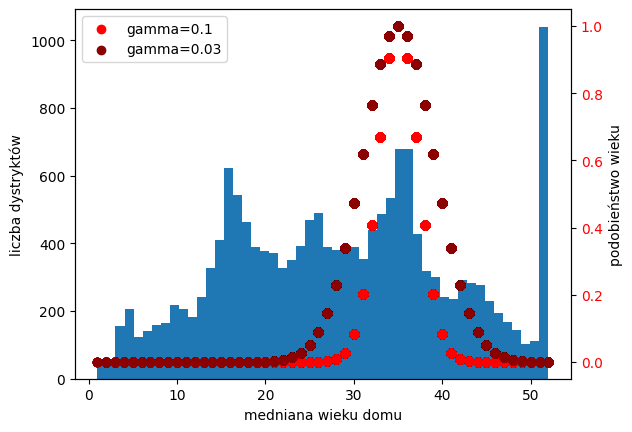

In [54]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("liczba dystryktów")
ax1.set_xlabel("medniana wieku domu")
ax1.hist(X_train['housing_median_age'], bins=50)

ax2 = ax1.twinx()
ax2.scatter(X_train['housing_median_age'], X_train['age_simil_35_v1'], label='gamma=0.1', color='red')
ax2.scatter(X_train['housing_median_age'], X_train['age_simil_35_v2'], label='gamma=0.03', color='darkred')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel("podobieństwo wieku")
ax2.legend(loc='upper left')

plt.show()

In [55]:
X_train.drop(['age_simil_35_v1', 'age_simil_35_v2'], axis=1, inplace=True)

In [56]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y_train.to_frame())

model = LinearRegression()
model.fit(X_train[['median_income']], scaled_labels)
some_new_data = X_train[['median_income']].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [57]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())
model.fit(X_train[['median_income']], y_train)
TTR_predictions = model.predict(some_new_data)
TTR_predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [58]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train[['population']])
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [59]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(X_train[['housing_median_age']])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

In [60]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(X_train[['latitude', 'longitude']])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

In [61]:
sample_array = np.array([[1.,2.],[3.,4.]])
sample_array

array([[1., 2.],
       [3., 4.]])

In [62]:
ratio_transformer = FunctionTransformer(lambda X: X[:,0]/X[:,1])
ratio_transformer.transform(sample_array)

array([0.5 , 0.75])

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean
  def fit(self, X, y=None):
    X = check_array(X)
    self.mean = X.mean(axis=0)
    self.scale = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self
  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    if self.with_mean:
      X = X - self.mean
    return X/self.scale

In [64]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=100, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Podobieństwo {i} skupienia" for i in range(self.n_clusters)]

In [65]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similariteis = cluster_simil.fit_transform(X_train[['latitude', 'longitude']], sample_weight=y_train)
similariteis[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

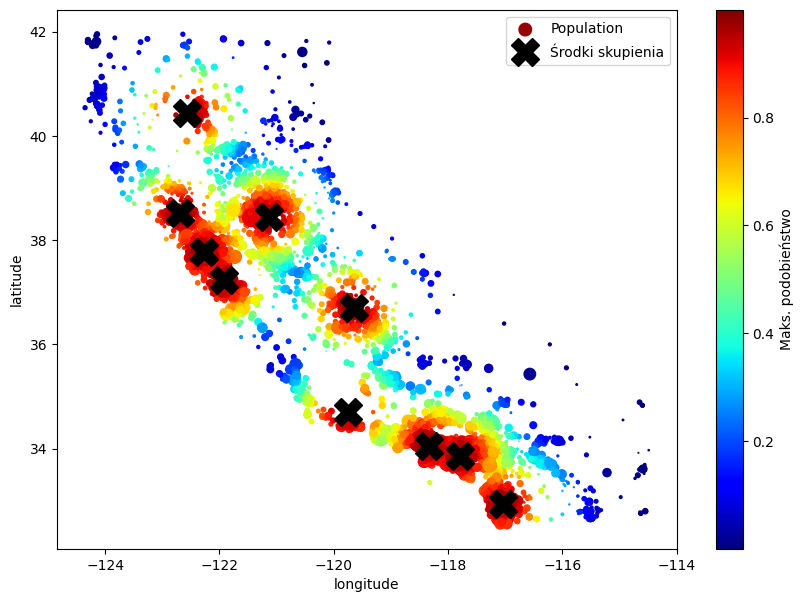

In [66]:
X_train['Maks. podobieństwo'] = similariteis.max(axis=1)
X_train.plot(kind="scatter", x="longitude", y="latitude", s=X_train['population']/100, label='Population', c='Maks. podobieństwo', cmap='jet', colorbar=True, legend=True, sharex=True, figsize=(10,7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         marker='X', color='black', linestyle='', markersize=20, label='Środki skupienia')
plt.legend()

plt.show()

In [67]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [68]:
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [69]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [70]:
X_train_numprepared = num_pipeline.fit_transform(X_train_num)
X_train_numprepared_df = pd.DataFrame(X_train_numprepared, columns=num_pipeline.get_feature_names_out(), index=X_train.index)
X_train_numprepared_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,1.039220e-16,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.272777e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.710538e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.462699e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.468327e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.344681e+01,1.359152e+01,1.268893e+01,5.882868e+00


In [71]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [72]:
num_pipeline[1]

StandardScaler()

In [73]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [74]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [75]:
from sklearn.compose import ColumnTransformer
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])
preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [76]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing =  make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022C7350A8A0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022C6C07A480>)])

In [77]:
X_train_prepared = preprocessing.fit_transform(X_train)

In [78]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(SimpleImputer(strategy='median'), FunctionTransformer(column_ratio, feature_names_out=ratio_name), StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [79]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 25)

In [80]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Podobieństwo 0 skupienia',
       'geo__Podobieństwo 1 skupienia', 'geo__Podobieństwo 2 skupienia',
       'geo__Podobieństwo 3 skupienia', 'geo__Podobieństwo 4 skupienia',
       'geo__Podobieństwo 5 skupienia', 'geo__Podobieństwo 6 skupienia',
       'geo__Podobieństwo 7 skupienia', 'geo__Podobieństwo 8 skupienia',
       'geo__Podobieństwo 9 skupienia', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__Maks. podobieństwo'],
      dtype=object)

In [81]:
X_train_prepared_df = pd.DataFrame(
    X_train_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)
X_train_prepared_df

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Podobieństwo 0 skupienia,geo__Podobieństwo 1 skupienia,...,geo__Podobieństwo 7 skupienia,geo__Podobieństwo 8 skupienia,geo__Podobieństwo 9 skupienia,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age,remainder__Maks. podobieństwo
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119,0.633604
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630,0.687100
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428,-0.862628
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891,-0.980526
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800,0.216201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087,0.526147
13105,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146,-0.333472
19301,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721,0.188346
19121,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257,0.705844


In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared_df, y_train)

LinearRegression()

In [83]:
X_train_predictions = lin_reg.predict(X_train_prepared_df)
print(X_train_predictions[:5].round(-2))
print(y_train.iloc[:5].values)

[248000. 375800. 109000.  82300. 320900.]
[458300. 483800. 101700.  96100. 361800.]


In [84]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(y_true = y_train, y_pred = X_train_predictions)
lin_rmse

68277.9605755367

<Axes: >

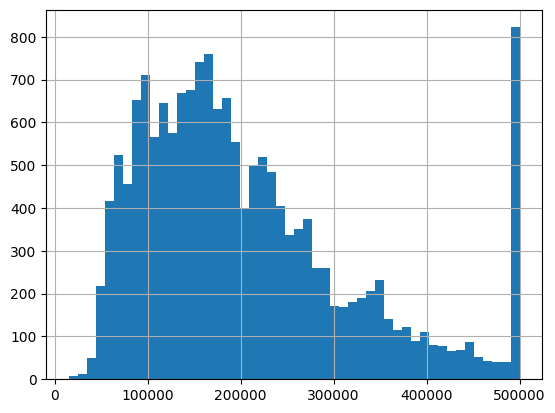

In [85]:
y_train.hist(bins=50)


In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X=X_train_prepared, y=y_train)

DecisionTreeRegressor(random_state=42)

In [87]:
X_train_predictions = tree_reg.predict(X_train_prepared_df)
tree_rmse = root_mean_squared_error(y_true=y_train, y_pred=X_train_predictions)
tree_rmse

c:\Users\jakub\Desktop\studia\Semestr5\WUM\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.0

In [88]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(estimator = tree_reg, X = X_train_prepared_df, y = y_train, scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([68352.02803048, 63056.29246197, 64733.2560525 , 64468.64698542,
       63401.97342798, 65187.33934269, 64766.02662295, 68346.13927655,
       69337.17848719, 66125.34911486])

In [89]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     65777.422980
std       2191.940256
min      63056.292462
25%      64534.799252
50%      64976.682983
75%      67790.941736
max      69337.178487
dtype: float64

In [90]:
lin_rmses = -cross_val_score(estimator = lin_reg, X = X_train_prepared_df, y = y_train, scoring="neg_root_mean_squared_error", cv=10)
lin_rmses

array([69246.53357011, 67872.0241287 , 65607.64800886, 79412.88752487,
       68050.5457642 , 68448.31086133, 67558.78188892, 71172.8531887 ,
       67622.97424894, 69451.84064589])